In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
#import matplotlib.figure as figure

import datetime
%matplotlib inline

In [58]:
pd.set_option('display.notebook_repr_html',False)
pd.set_option('display.max_columns',6)
pd.set_option('display.max_rows',10)
pd.set_option('display.width',78)
pd.set_option('precision',3)


In [39]:
path = '../YCdata/stock2015-2016.csv'
allData = pd.read_csv(path)
allData.head()

  Ticker        Date     Open  ...   Close  Adj Close    Volume
0   AAPL  2015-01-02  106.239  ...  109.33    104.274  53204600
1   AAPL  2015-01-05  103.282  ...  106.25    101.337  64285500
2   AAPL  2015-01-06  101.613  ...  106.26    101.346  65797100
3   AAPL  2015-01-07  102.243  ...  107.75    102.767  40105900
4   AAPL  2015-01-08  104.179  ...  111.89    106.716  59364500

[5 rows x 8 columns]

In [40]:
allData.shape

(4536, 8)

In [41]:
allData[['Ticker','Date','Close']]

     Ticker        Date   Close
0      AAPL  2015-01-02  109.33
1      AAPL  2015-01-05  106.25
2      AAPL  2015-01-06  106.26
3      AAPL  2015-01-07  107.75
4      AAPL  2015-01-08  111.89
...     ...         ...     ...
4531     KO  2016-12-23   41.60
4532     KO  2016-12-27   41.61
4533     KO  2016-12-28   41.39
4534     KO  2016-12-29   41.60
4535     KO  2016-12-30   41.46

[4536 rows x 3 columns]

In [42]:
just_close_price = allData[['Ticker','Date','Close']]
dailyClose = just_close_price.pivot('Ticker','Date','Close')  #生成数据透视表
dailyClose

Date    2015-01-02  2015-01-05  2015-01-06  ...  2016-12-28  2016-12-29  \
Ticker                                      ...                           
AA           15.88       14.96       15.07  ...       29.43       28.89   
AAPL        109.33      106.25      106.26  ...      116.76      116.73   
DAL          49.18       48.36       47.22  ...       49.51       49.31   
GE           25.06       24.60       24.07  ...       31.70       31.71   
IBM         162.06      159.51      156.07  ...      166.19      166.60   
KO           42.14       42.14       42.46  ...       41.39       41.60   
MSFT         46.76       46.33       45.65  ...       62.99       62.90   
PEP          94.44       93.73       93.02  ...      104.62      104.99   
UAL          66.34       66.15       64.58  ...       73.53       73.28   

Date    2016-12-30  
Ticker              
AA           28.08  
AAPL        115.82  
DAL          49.19  
GE           31.60  
IBM         165.99  
KO           41.46  
MSFT  

In [43]:
dailyClose.columns

Index(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
       '2015-01-09', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15',
       ...
       '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21', '2016-12-22',
       '2016-12-23', '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30'],
      dtype='object', name='Date', length=504)

In [44]:
dailyClose.index

Index(['AA', 'AAPL', 'DAL', 'GE', 'IBM', 'KO', 'MSFT', 'PEP', 'UAL'], dtype='object', name='Ticker')

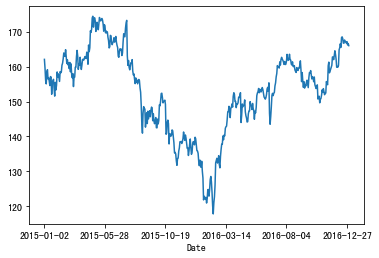

In [45]:
dailyClose.loc['IBM'].plot()
#dailyClose['IBM'].plt()  不加loc会报错


In [46]:
allData.columns

Index(['Ticker', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [47]:
just_volume = allData[['Ticker','Date','Volume']]
daily_volume = just_volume.pivot('Date','Ticker','Volume')
daily_volume

Ticker           AA      AAPL       DAL  ...      MSFT      PEP      UAL
Date                                     ...                            
2015-01-02  4340300  53204600   8637300  ...  27913900  3545700  6215000
2015-01-05  9026400  64285500  10556500  ...  39673900  6441000  5033400
2015-01-06  8063600  65797100  12880400  ...  36447900  6195000  6051700
2015-01-07  6637700  40105900  10516200  ...  29114100  6526300  5135000
2015-01-08  8185700  59364500  10499300  ...  29645200  7131600  6889500
...             ...       ...       ...  ...       ...      ...      ...
2016-12-23  2881800  14181200   4046300  ...  12403800  1769300  1623400
2016-12-27  1708900  18296900   3365600  ...  11763200  1505000  1092400
2016-12-28  2751100  20905900   4520200  ...  14653300  1878600  1946800
2016-12-29  3224400  15039500   3348300  ...  10250600  2438100  1272400
2016-12-30  2686000  30586300   4532400  ...  25579900  3484000  1720800

[504 rows x 9 columns]

In [59]:
msftV = daily_volume['MSFT']
msftV



Date
2015-01-02    27913900
2015-01-05    39673900
2015-01-06    36447900
2015-01-07    29114100
2015-01-08    29645200
                ...   
2016-12-23    12403800
2016-12-27    11763200
2016-12-28    14653300
2016-12-29    10250600
2016-12-30    25579900
Name: MSFT, Length: 504, dtype: int64

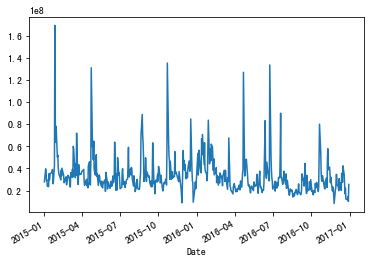

In [62]:

msftV.plot()


In [78]:
def convert_date(val):  #日期转化
    date_, time_ = val.__str__().split(' ')
    year,month,day = date_.split('-')
    return pd.datetime(int(year),int(month),int(day))

In [71]:
print(msftV.index[0].__str__())
print(msftV.index)

2015-01-02 00:00:00
DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)


In [79]:
msftV.index = msftV.index.map(convert_date) #新建列，处理时间。
msftV.index[0]

/Users/dante/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


Timestamp('2015-01-02 00:00:00')

In [87]:
msftV.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2016-12-16', '2016-12-19', '2016-12-20', '2016-12-21',
               '2016-12-22', '2016-12-23', '2016-12-27', '2016-12-28',
               '2016-12-29', '2016-12-30'],
              dtype='datetime64[ns]', name='Date', length=504, freq=None)

In [88]:
msftV

Date
2015-01-02    27913900
2015-01-05    39673900
2015-01-06    36447900
2015-01-07    29114100
2015-01-08    29645200
                ...   
2016-12-23    12403800
2016-12-27    11763200
2016-12-28    14653300
2016-12-29    10250600
2016-12-30    25579900
Name: MSFT, Length: 504, dtype: int64

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]),
 <a list of 9 Text xticklabel objects>)

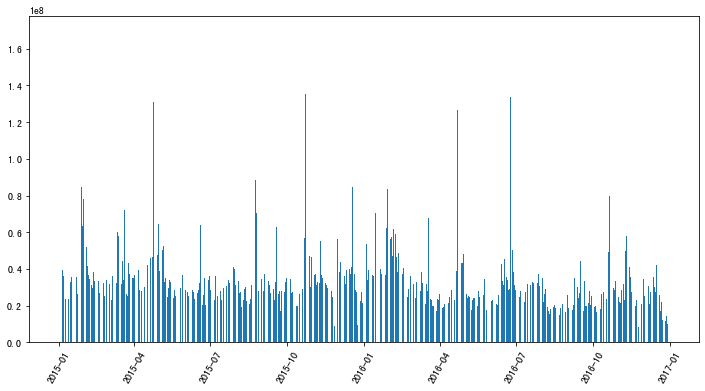

In [90]:
fig = plt.figu re(figsize=(12,6))  #1200*600
ax1 = fig.add_subplot(111)
ax1.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m'))  #代表时间
ax1.bar(msftV.index,msftV)
plt.xticks(rotation = 60) #日期文字设定旋转